In [8]:
from PIL import Image, ImageDraw
import random
from pynq import Overlay
from pynq.drivers import HDMI
from pynq.drivers.video import VMODE_640x480
from pynq.drivers import Frame

import cv2
import sys
import io
%matplotlib inline 
from matplotlib import pyplot as plt
import numpy as np

In [9]:
# Initialize
width = 640
height = 480
num = 100

Overlay("base.bit").download()
hdmi_out = HDMI('out')
# hdmi_out.start()
# monitor configuration: 640*480 @ 60Hz
hdmi_out.mode(VMODE_640x480)
hdmi_out.start()

# monitor (output) frame buffer size
frame_out_w = 1920
frame_out_h = 1080

# Create an empty array
snow_list = []


# Loop and add a snow flake in a random x,y position
for i in range(num):
    x = random.randrange(0, width)
    y = random.randrange(-height-10, -10)
#     y = random.randrange(0,height)
    snow_list.append([x, y])

In [11]:
videoIn = cv2.VideoCapture(0)
print("capture device is open: " + str(videoIn.isOpened()))

capture device is open: True


0


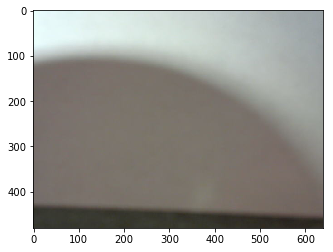

for loop has exited


In [12]:
for x in range (0,1):
    print(x)
    ret, frame_vga = videoIn.read()
    
    
    frame_1920p = np.zeros((1080,1920,3)).astype(np.uint8)       
    frame_1920p[0:480,0:640,:] = frame_vga[0:480,0:640,:]
    
    hdmi_out.frame_raw(bytearray(frame_1920p.astype(np.int8).tobytes()))
    
    frame = hdmi_out.frame()
    plt.imshow(frame_vga[:,:,[2,1,0]])
    plt.show()
    orig_img_path = '/home/xilinx/jupyter_notebooks/Pictures/'+str(x)+'snow.jpg'
    frame.save_as_jpeg(orig_img_path)
    
print("for loop has exited")

In [13]:
image = Image.open('/home/xilinx/jupyter_notebooks/Pictures/0snow.jpg')
for v in range (width):
        for w in range (height):
            r = image.getpixel((v,w))[0]
            g = image.getpixel((v,w))[1]
            b = image.getpixel((v,w))[2]
            
            if r<128 and g<128 and b<128:
                r = 0
                g = 0
                b = 0
            else:
                r = 255
                g = 255
                b = 255
            image.putpixel((v,w),(r,g,b))
orig_img_path = '/home/xilinx/jupyter_notebooks/Pictures/0snow.jpg'
image.save(orig_img_path)
    

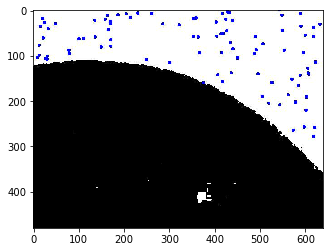

In [14]:
for a in range (0,100):
    image = Image.open('/home/xilinx/jupyter_notebooks/Pictures/0snow.jpg')
    #image.convert("L")
    #plt.imshow(image[:,:,[2,1,0]])
    #plt.show()
    
    
    # Process each snow flake in the list
    for i in range(len(snow_list)):
        # Draw the snow flake
        draw = ImageDraw.Draw(image)
        draw.ellipse((snow_list[i][0]-3, snow_list[i][1]-3, snow_list[i][0]+3, snow_list[i][1]+3), fill = 'blue', outline ='blue')
        
        # Check collision
        xcord = snow_list[i][0]
        ycord = snow_list[i][1]+6

        if ycord<height and ycord>0:
            r = image.getpixel((xcord,ycord))[0]
            g = image.getpixel((xcord,ycord))[1]
            b = image.getpixel((xcord,ycord))[2]
            
#             print(r,g,b)
            
#             if r<128 and g<128 and b<128:
#                 r = 0
#                 g = 0
#                 b = 0
#             else:
#                 r = 255
#                 g = 255
#                 b = 255
                
            

            if r==0 and g==0 and b==0:
                snow_list[i][0]=random.randrange(0, width)
                snow_list[i][1]=random.randrange(-50, -10)

        # Move the snow flake down one pixel
        snow_list[i][1] += 5

        # If the snow flake has moved off the bottom of the screen
        if snow_list[i][1] > height:
            # Reset it just above the top
            y = random.randrange(-50, -10)
            snow_list[i][1] = y
            # Give it a new x position
            x = random.randrange(0, width)
            snow_list[i][0] = x
    

    orig_img_path = '/home/xilinx/jupyter_notebooks/Pictures/0new_snow.jpg'
    image.save(orig_img_path)
    
    cap = cv2.VideoCapture(orig_img_path)
#     print("capture device is open: " + str(cap.isOpened()))
     
    ret, frame_img = cap.read()
    frame_1920p = np.zeros((1080,1920,3)).astype(np.uint8)       
    frame_1920p[0:480,0:640,:] = frame_img[0:480,0:640,:]
    hdmi_out.frame_raw(bytearray(frame_1920p.astype(np.int8).tobytes()))
    plt.imshow(frame_img[:,:,[2,1,0]])


In [15]:
cap.release()
hdmi_out.stop()
del hdmi_out